In [2]:
!pip install -q xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize models
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Train and Evaluate Models
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    results.append({'Model': name, 'Accuracy': accuracy})

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost: 0.90
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       112
           1       0.87      0.91      0.89        88

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Training LightGBM...
[LightGBM] [Info] Number of positive: 411, number of negative: 389
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513750 -> initscore=0.055014
[LightGBM] [Info] Start training from score 0.055014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Adaboost: 0.80
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       112
           1       0.74      0.83      0.78        88

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Training DecisionTree...
Accuracy for DecisionTree: 0.80
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       112
           1       0.76      0.78      0.77        88

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



In [6]:
# Reduce dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_scaled = StandardScaler().fit_transform(X_train)  # Standardize before PCA
X_train_2d = pca.fit_transform(X_train_scaled)

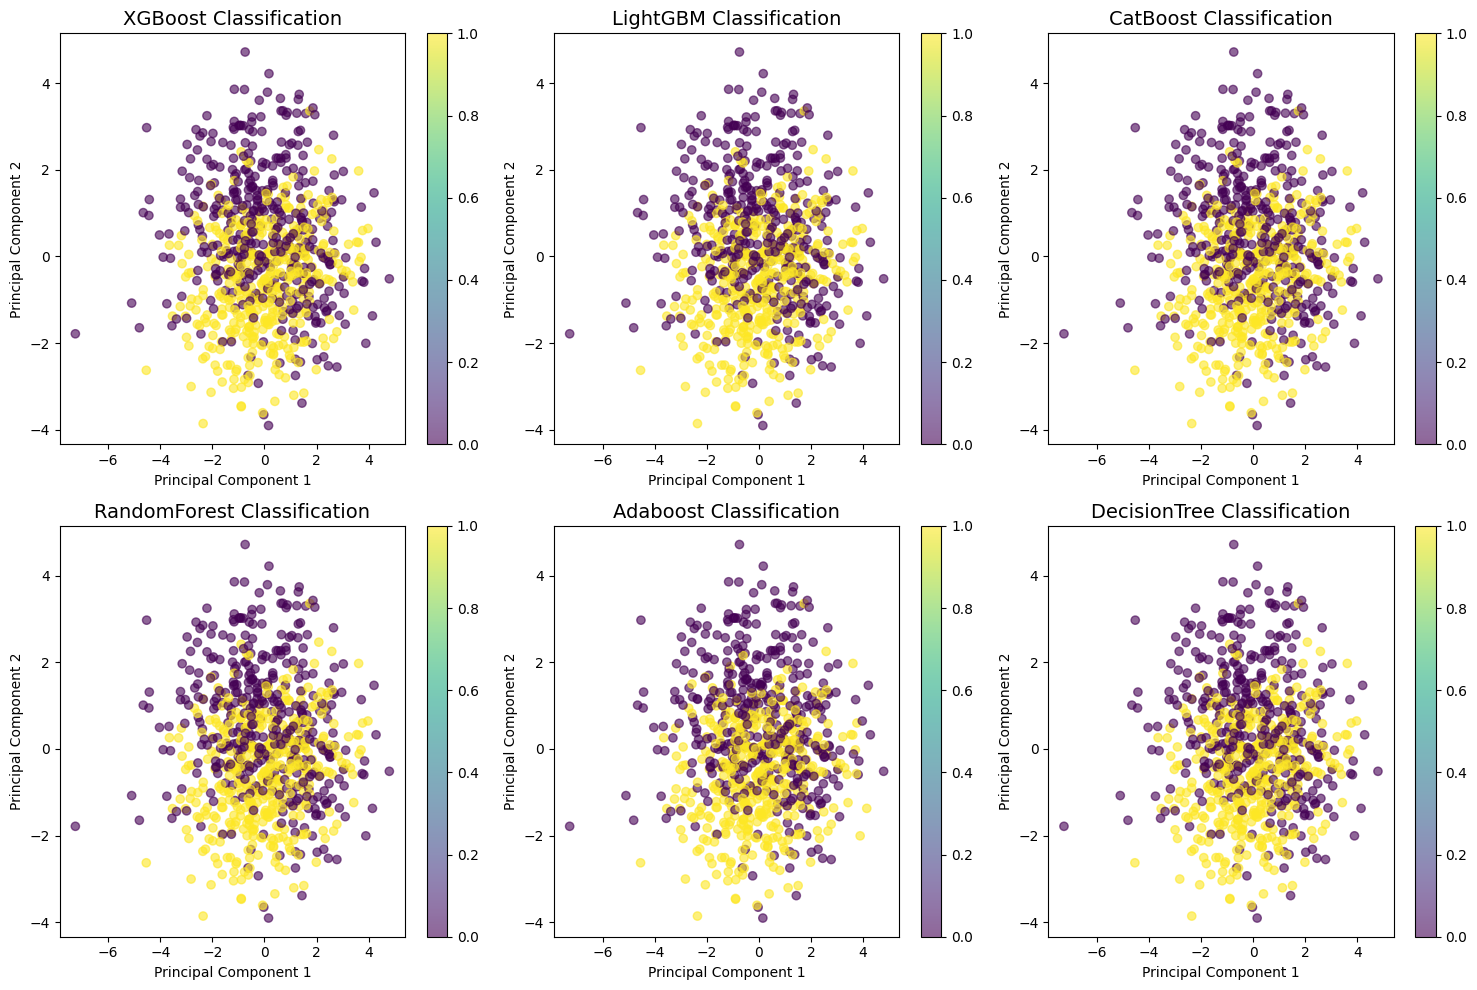

In [8]:
# Create scatterplots for each model
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    # Predict on 2D transformed data
    y_pred_2d = model.predict(X_train)

    # Plot the data
    plt.subplot(2, 3, i)  # Adjust grid based on the number of models
    scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_pred_2d, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(f'{name} Classification', fontsize=14)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()